[ 0.125  0.16   0.165  0.17   0.185  0.22   0.225  0.235  0.22   0.23
  0.25   0.28   0.27   0.25   0.255  0.245  0.235  0.235  0.25   0.23
  0.245  0.23   0.22   0.215  0.18   0.12   0.075  0.065  0.06   0.055
  0.025 -0.005 -0.04  -0.085 -0.135 -0.145 -0.14  -0.12  -0.12  -0.16
 -0.195 -0.2   -0.215 -0.2   -0.2   -0.215 -0.255 -0.27  -0.225 -0.225
 -0.24  -0.25  -0.23  -0.19  -0.18  -0.2   -0.21  -0.215 -0.21  -0.21
 -0.205 -0.225 -0.23  -0.24  -0.245 -0.23  -0.23  -0.21  -0.2   -0.185
 -0.175 -0.175 -0.19  -0.19  -0.19  -0.2   -0.175 -0.13  -0.09  -0.095
 -0.13  -0.17  -0.16  -0.135 -0.1   -0.09  -0.115 -0.115 -0.08  -0.04
 -0.065 -0.105 -0.12  -0.12  -0.11  -0.105 -0.11  -0.15  -0.155 -0.16
 -0.15  -0.165 -0.19  -0.215 -0.27  -0.32  -0.34  -0.32  -0.28  -0.285
 -0.31  -0.36  -0.375 -0.34  -0.31  -0.31  -0.305 -0.32  -0.32  -0.35
 -0.35  -0.325 -0.3   -0.32  -0.38  -0.395 -0.335 -0.275 -0.26  -0.29
 -0.33  -0.335 -0.33  -0.325 -0.27  -0.145  0.045  0.28   0.535  0.83
  1.105  1.335 

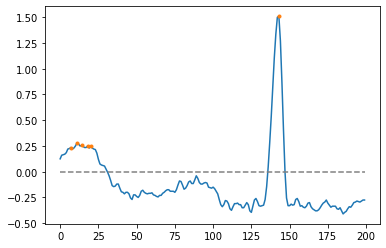

In [11]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np

x = electrocardiogram()[200:400]
print(x)
peaks, _ = find_peaks(x, height=0)
print(peaks)
for i in peaks:
    print(x[i])
plt.plot(x)
plt.plot(peaks, x[peaks], ".")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()





<class 'numpy.ndarray'>
 b = {} (array([1, 4, 7, 9]),) <class 'numpy.ndarray'>
[[ 2  5  8 10]] <class 'numpy.ndarray'>
[0.73645549 0.6544589  0.78441955 0.84195332]


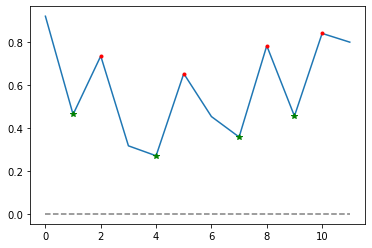

In [27]:
from scipy.signal import argrelextrema

x = np.random.random(12)
print(type(x))
# for local maxima
argrelextrema(x, np.greater)

# for local minima
b =  argrelextrema(x, np.less)
print(' b = {}',b,type(np.asarray(b)))
# peaks, _ = find_peaks(x, height=0)
peaks = np.asarray(argrelextrema(x, np.greater))
low = np.asarray(argrelextrema(x, np.less))
print(peaks,type(peaks))
for i in peaks:
    print(x[i])
plt.plot(x)
plt.plot(peaks, x[peaks], ".",color='red')
plt.plot(low,x[low],'*',color='green')
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()



In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema

# Generate a noisy AR(1) sample

np.random.seed(0)
rs = np.random.randn(200)
xs = [0]
for r in rs:
    xs.append(xs[-1] * 0.9 + r)
df = pd.DataFrame(xs, columns=['data'])

n = 5  # number of points to be checked before and after

# Find local peaks

df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal,
                    order=n)[0]]['data']
df['max'] = df.iloc[argrelextrema(df.data.values, np.greater_equal,
                    order=n)[0]]['data']

# Plot results

# plt.scatter(df.index, df['min'], c='r')
# plt.scatter(df.index, df['max'], c='g')
# plt.plot(df.index, df['data'])
# plt.show()
# df.iloc[argrelextrema(df.data.values, np.less_equal,order=n)[0]]['data']
df.data.values

array([ 0.        ,  1.76405235,  1.98780432,  2.76776187,  4.73187888,
        6.12624899,  4.53634621,  5.0328    ,  4.3781628 ,  3.83712766,
        3.8640134 ,  3.62165563,  4.71376357,  5.00342494,  4.62475746,
        4.60614495,  4.47920478,  5.52536338,  4.76766878,  4.6039696 ,
        3.2894769 ,  0.4075394 ,  1.02040405,  1.78279984,  0.86235484,
        3.04587398,  1.28692091,  1.20398733,  0.89640475,  2.33954349,
        3.57494791,  3.37240055,  3.41332301,  2.18420496, -0.015012  ,
       -0.36142295, -0.16893169,  1.07825216,  2.17280679,  1.5681993 ,
        1.10907662, -0.05038401, -1.46536355, -3.02509738, -0.77181225,
       -1.20428321, -1.52192919, -2.62253163, -1.58278811, -3.03840715,
       -2.94730671, -3.5480426 , -2.80633584, -3.0365074 , -3.91348884,
       -3.55032219, -2.7669581 , -2.42374506, -1.87889866, -2.32533089,
       -2.45553896, -2.88244552, -2.95375413, -3.471525  , -4.8506551 ,
       -4.18816345, -4.17112804, -5.38421358, -4.38300997, -4.85